In [17]:
#########################importing libraries#########################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from sklearn.preprocessing import OneHotEncoder
from qiskit import BasicAer, execute
from qiskit.algorithms.optimizers import SPSA
from qiskit_machine_learning.algorithms.classifiers import VQC

In [18]:
#########################importing data#########################
data = load_breast_cancer()

In [19]:
#########################pd dataframe#########################
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [20]:
x = df.drop(['target'], axis=1)
y = df['target']

In [21]:
#########################pca#########################
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
pca = PCA(n_components=2)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


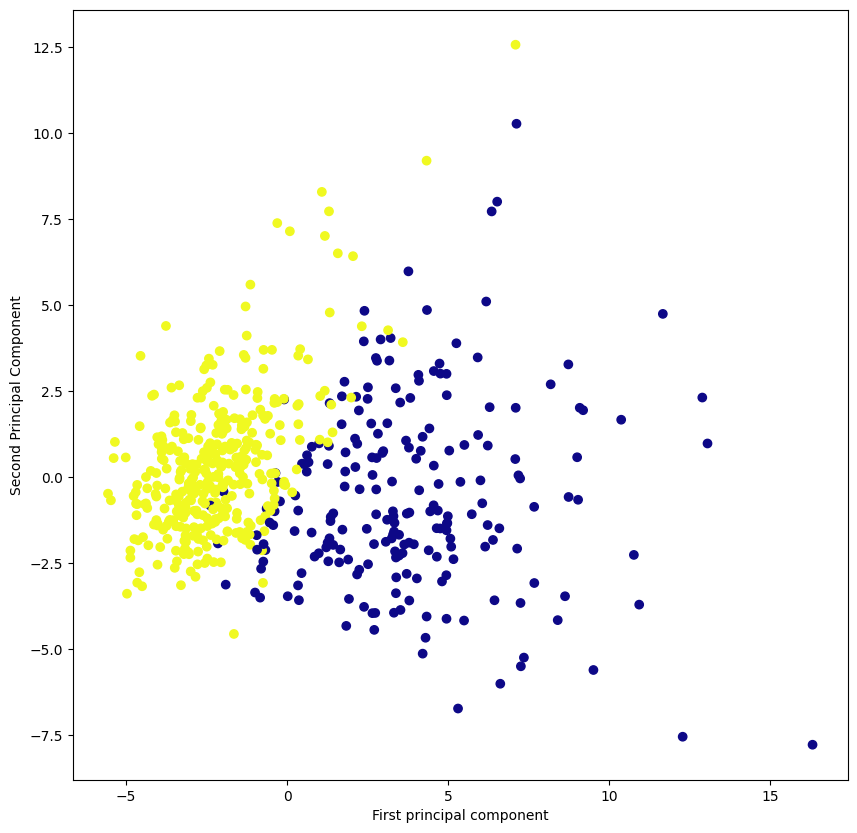

In [22]:
#########################plot#########################
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [23]:
########################preparing data#########################
x = MinMaxScaler().fit_transform(x)



In [24]:
#########################splitting data#########################
algorithm_globals.random_seed = 1234
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=algorithm_globals.random_seed )


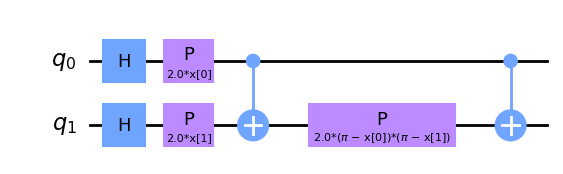

In [25]:
###########################quantum circuit#########################
num_features = x_train.shape[1]
features_map = ZZFeatureMap(num_features, reps=1)
features_map.decompose().draw(output='mpl', fold=20, filename='circuit.png')
 



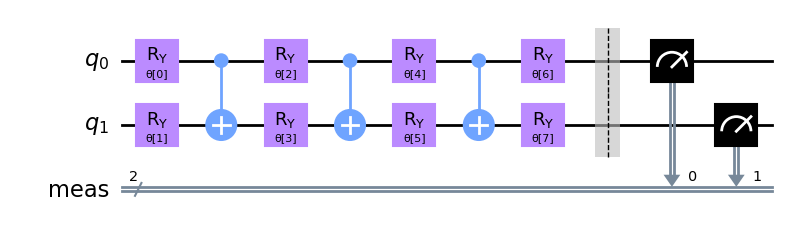

In [26]:
anzsatze = RealAmplitudes(num_features, reps=3)
anzsatze.measure_all()
anzsatze.decompose().draw(output='mpl', fold=20, filename='anzsatze.png')


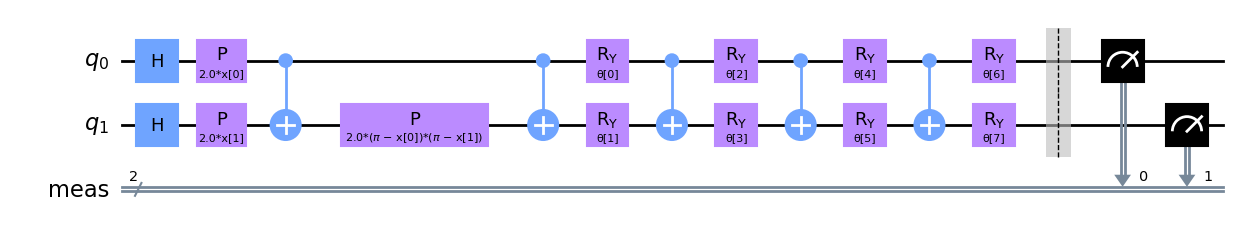

In [27]:
circuit = features_map.compose(anzsatze)
circuit.decompose().draw(output='mpl', filename='all.png')

In [28]:
initial_point = np.random.random(anzsatze.num_parameters)
print(initial_point)

[0.64612246 0.7263024  0.51327988 0.28166768 0.32620087 0.10430147
 0.31199058 0.51047014]


In [29]:
encoder = OneHotEncoder()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

y_train_oh = encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_oh = encoder.fit_transform(y_test.reshape(-1,1)).toarray()



In [30]:
vqc = VQC(feature_map=features_map, ansatz=anzsatze, loss='cross_entropy', optimizer=SPSA(), initial_point=initial_point, quantum_instance=BasicAer.get_backend('qasm_simulator'))


C:\Users\hp\AppData\Local\Temp\ipykernel_12028\3515239746.py:1: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.
  vqc = VQC(feature_map=features_map, ansatz=anzsatze, loss='cross_entropy', optimizer=SPSA(), initial_point=initial_point, quantum_instance=BasicAer.get_backend('qasm_simulator'))


In [ ]:
vqc.fit(x_train, y_train_oh)

In [ ]:
print(f'Training accuracy: {vqc.score(x_train, y_train_oh):.2f}')

In [ ]:
#########################plot#########################
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()